## 安装mindformers



In [14]:
# 下载mindformers代码
!git clone -b dev https://gitee.com/mindspore/mindformers.git

Cloning into 'mindformers'...
remote: Enumerating objects: 25476, done.
remote: Counting objects: 100% (4169/4169), done.
remote: Compressing objects: 100% (2198/2198), done.
remote: Total 25476 (delta 2953), reused 2836 (delta 1954), pack-reused 21307
Receiving objects: 100% (25476/25476), 39.63 MiB | 4.53 MiB/s, done.
Resolving deltas: 100% (18545/18545), done.


In [29]:
%cd ../

/home/ma-user/work/mindformers


In [31]:
#安装
# %cd mindformers
!bash build.sh

---------------- MindFormers: build start ----------------
running bdist_wheel
running build
running build_py
creating build/lib/mindformers
copying mindformers/version_control.py -> build/lib/mindformers
copying mindformers/__init__.py -> build/lib/mindformers
copying mindformers/auto_class.py -> build/lib/mindformers
copying mindformers/mindformer_book.py -> build/lib/mindformers
creating build/lib/mindformers/models
copying mindformers/models/base_processor.py -> build/lib/mindformers/models
copying mindformers/models/__init__.py -> build/lib/mindformers/models
copying mindformers/models/sentencepiece_model_pb2.py -> build/lib/mindformers/models
copying mindformers/models/utils.py -> build/lib/mindformers/models
copying mindformers/models/base_fast_tokenizer.py -> build/lib/mindformers/models
copying mindformers/models/base_config.py -> build/lib/mindformers/models
copying mindformers/models/build_config.py -> build/lib/mindformers/models
copying mindformers/models/build_tokenizer.p

## 下载数据集
从 Google Drive 或者 Tsinghua Cloud 下载处理好的 ADGEN 数据集，将解压后的 AdvertiseGen 任意目录下
https://cloud.tsinghua.edu.cn/f/b3f119a008264b1cabd1/?dl=1

In [24]:
# 解压文件
!tar -zxvf AdvertiseGen.tar.gz

AdvertiseGen/
AdvertiseGen/train.json
AdvertiseGen/dev.json


将任务配置文件 configs/glm/run_glm_6b_*.yaml 中的 ==== dataset config ==== 部分中的 dataset_dir 指向 *.json 文件，vocab_file 指向词表文件

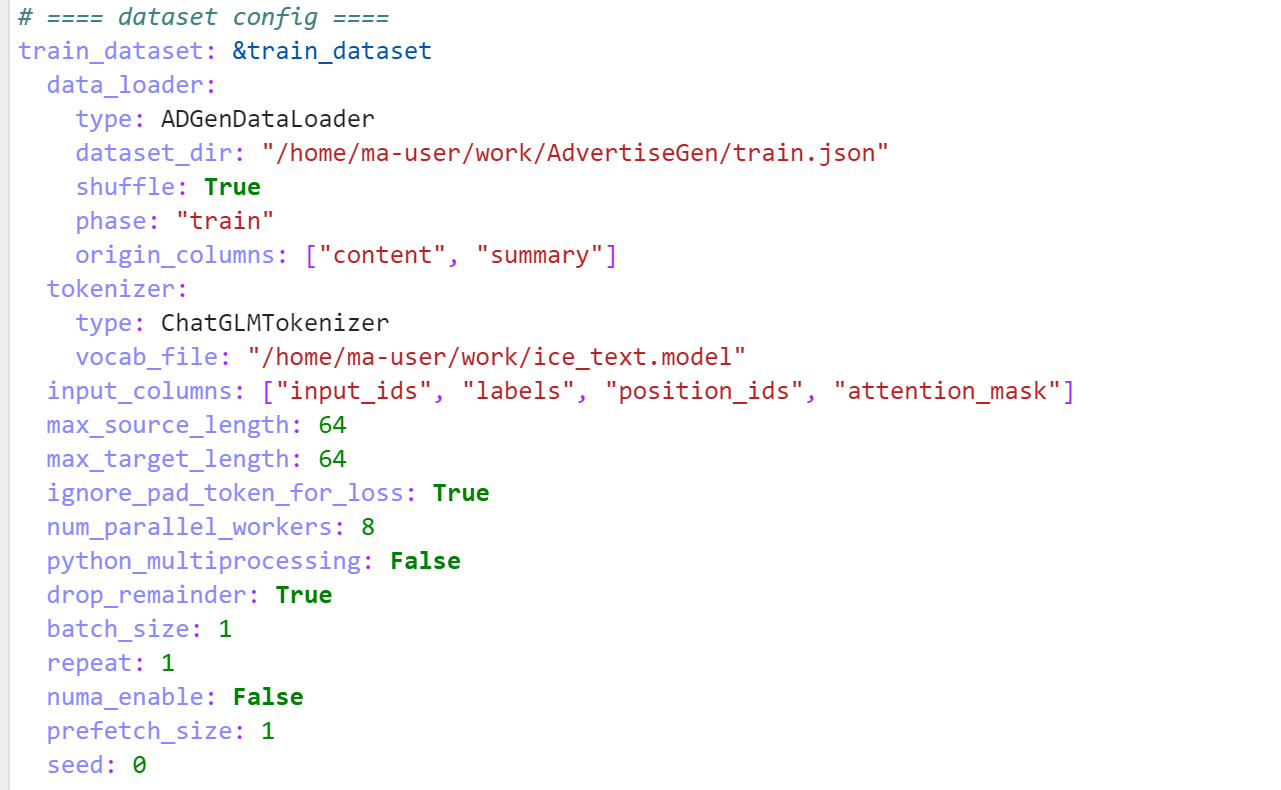
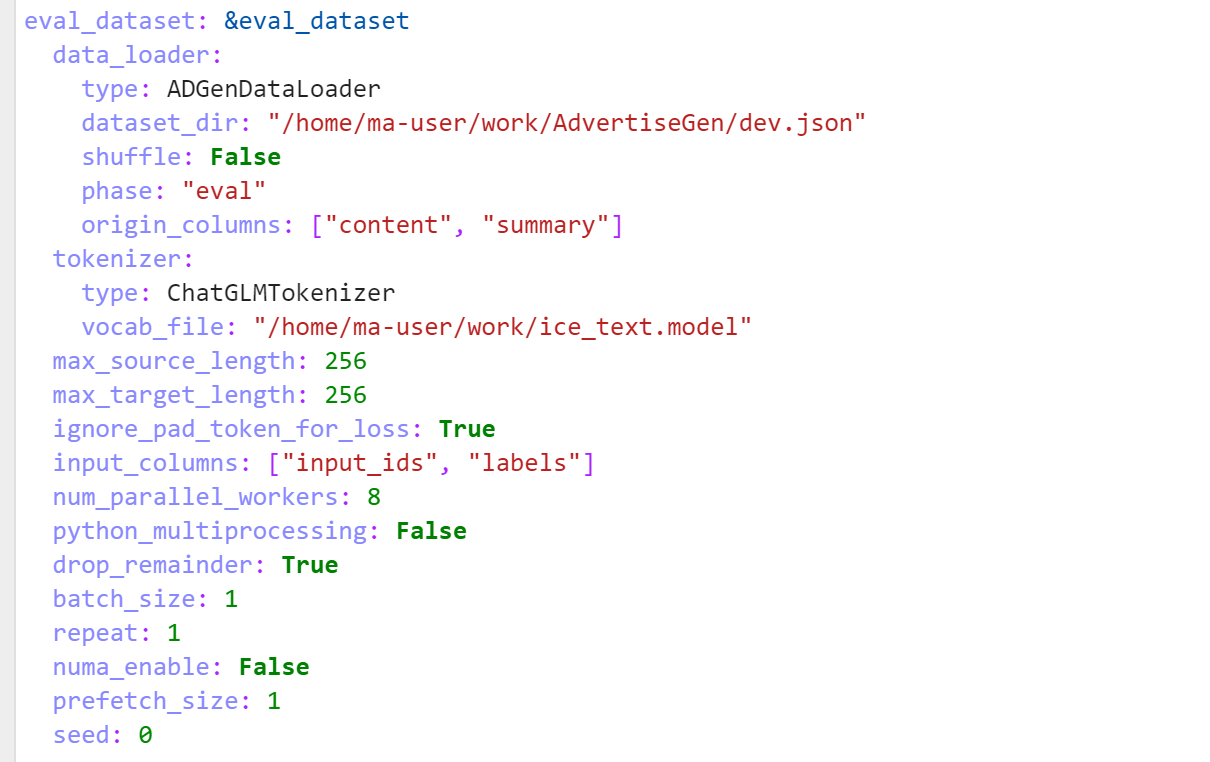

In [1]:
#执行命令生成训练数据集：
!python /home/ma-user/work/mindformers/mindformers/tools/dataset_preprocess/glm/adgen_dataset.py \
    --input_file /home/ma-user/work/AdvertiseGen/train.json \
    --vocab_file /home/ma-user/work/ice_text.model \
    --output_file /home/ma-user/work/train_0604_128.mindrecord \
    --max_source_length 64 \
    --max_target_length 64 \
    --mode train

/usr/local/Ascend/ascend-toolkit/7.0.RC1/python/site-packages/tbe/tvm/contrib/ccec.py:766: DeprecationWarning: invalid escape sequence \L
  if not dirpath.find("AppData\Local\Temp"):
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/classifier/transdata/transdata_classifier.py:222: DeprecationWarning: invalid escape sequence \B
  """
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/unify_schedule/vector/transdata/common/graph/transdata_graph_info.py:140: DeprecationWarning: invalid escape sequence \c
  """
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, 

In [5]:
#执行命令生成评估数据集：
!python /home/ma-user/work/mindformers/mindformers/tools/dataset_preprocess/glm/adgen_dataset.py \
    --input_file /home/ma-user/work/AdvertiseGen/dev.json \
    --vocab_file /home/ma-user/work/ice_text.model \
    --output_file /home/ma-user/work/eval_0604_256.mindrecord \
    --max_source_length 256 \
    --max_target_length 256 \
    --mode eval

/usr/local/Ascend/ascend-toolkit/7.0.RC1/python/site-packages/tbe/tvm/contrib/ccec.py:766: DeprecationWarning: invalid escape sequence \L
  if not dirpath.find("AppData\Local\Temp"):
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/classifier/transdata/transdata_classifier.py:222: DeprecationWarning: invalid escape sequence \B
  """
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/unify_schedule/vector/transdata/common/graph/transdata_graph_info.py:140: DeprecationWarning: invalid escape sequence \c
  """
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, 

## 下载权重文件和tokenizer

In [1]:
#下载权重文件和tokenizer
import mindspore; mindspore.set_context(mode=0, device_id=0)
from mindformers import AutoModel, AutoTokenizer, TextGenerationPipeline
model = AutoModel.from_pretrained("glm_6b")
tokenizer = AutoTokenizer.from_pretrained("glm_6b")

#from_pretrained() 接口会自动从云上下载预训练的模型，存储路径：mindformers/checkpoint_download/glm

/usr/local/Ascend/ascend-toolkit/7.0.RC1/python/site-packages/tbe/tvm/contrib/ccec.py:766: DeprecationWarning: invalid escape sequence \L
  if not dirpath.find("AppData\Local\Temp"):
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/classifier/transdata/transdata_classifier.py:222: DeprecationWarning: invalid escape sequence \B
  """
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/unify_schedule/vector/transdata/common/graph/transdata_graph_info.py:140: DeprecationWarning: invalid escape sequence \c
  """
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, 

2024-01-22 23:28:51,828 - mindformers[mindformers/auto_class.py:405] - INFO - default yaml config in ./checkpoint_download/glm/glm_6b.yaml is used.
2024-01-22 23:30:14,116 - mindformers[mindformers/tools/download_tools.py:95] - INFO - Start download ./checkpoint_download/glm/glm_6b.ckpt


Downloading: 13.4GB [05:23, 41.4MB/s]                                                               

2024-01-22 23:35:37,880 - mindformers[mindformers/tools/download_tools.py:108] - INFO - Download completed!, times: 324.25s
2024-01-22 23:35:37,884 - mindformers[mindformers/models/base_model.py:110] - INFO - start to read the ckpt file: 13415886863



[WARNING] ME(1204222:281473851277488,MainProcess):2024-01-22-23:37:09.763.187 [mindspore/train/serialization.py:172] The type of transformer.word_embeddings.embedding_table:Float16 in 'parameter_dict' is different from the type of it in 'net':Float32, then the type convert from Float16 to Float32 in the network.
[WARNING] ME(1204222:281473851277488,MainProcess):2024-01-22-23:37:13.199.850 [mindspore/train/serialization.py:172] The type of transformer.layers.0.input_layernorm.gamma:Float16 in 'parameter_dict' is different from the type of it in 'net':Float32, then the type convert from Float16 to Float32 in the network.
[WARNING] ME(1204222:281473851277488,MainProcess):2024-01-22-23:37:13.201.877 [mindspore/train/serialization.py:172] The type of transformer.layers.0.input_layernorm.beta:Float16 in 'parameter_dict' is different from the type of it in 'net':Float32, then the type convert from Float16 to Float32 in the network.
[WARNING] ME(1204222:281473851277488,MainProcess):2024-01-22

2024-01-22 23:37:45,677 - mindformers[mindformers/models/base_model.py:115] - INFO - weights in ./checkpoint_download/glm/glm_6b.ckpt are loaded
2024-01-22 23:37:45,681 - mindformers[mindformers/auto_class.py:453] - INFO - model built successfully!
2024-01-22 23:37:45,683 - mindformers[mindformers/auto_class.py:704] - INFO - Config in the yaml file ./checkpoint_download/glm/glm_6b.yaml are used for tokenizer building.
2024-01-22 23:37:46,870 - mindformers[mindformers/auto_class.py:711] - INFO - Load the tokenizer name ChatGLMTokenizer from the ./checkpoint_download/glm/glm_6b.yaml
2024-01-22 23:37:46,872 - mindformers[mindformers/models/base_tokenizer.py:2058] - INFO - Download the vocab from the url https://ascend-repo-modelzoo.obs.cn-east-2.myhuaweicloud.com/XFormer_for_mindspore/glm/ice_text.model to ./checkpoint_download/glm/ice_text.model.
2024-01-22 23:37:47,390 - mindformers[mindformers/tools/download_tools.py:95] - INFO - Start download ./checkpoint_download/glm/ice_text.model


Downloading: 2.71MB [00:00, 11.2MB/s]                                                               

2024-01-22 23:37:47,638 - mindformers[mindformers/tools/download_tools.py:108] - INFO - Download completed!, times: 0.76s
2024-01-22 23:37:47,684 - mindformers[mindformers/models/base_tokenizer.py:1986] - INFO - config in the yaml file ./checkpoint_download/glm/glm_6b.yaml are used for tokenizer building.


2024-01-22 23:37:47,730 - mindformers[mindformers/models/base_tokenizer.py:1995] - WARNING - Can't find the tokenizer_config.json in the file_dict. The content of file_dict is : {}
2024-01-22 23:37:47,732 - mindformers[mindformers/models/base_tokenizer.py:2002] - INFO - build tokenizer class name is: ChatGLMTokenizer using args {'bos_token': '<sop>', 'eos_token': '<eop>', 'end_token': '</s>', 'mask_token': '[MASK]', 'gmask_token': '[gMASK]', 'pad_token': '<pad>', 'unk_token': '<unk>', 'vocab_file': './checkpoint_download/glm/ice_text.model'}.
2024-01-22 23:37:48,669 - mindformers[mindformers/models/base_tokenizer.py:1307] - WARNING - The `sanitize_special_tokens` will be removed in transformers v5.
2024-01-22 23:37:49,196 - mindformers[mindformers/auto_class.py:790] - INFO - ChatGLMTokenizer Tokenizer built successfully!


In [2]:
%pwd
%cd mindformers/scripts

/home/ma-user/work/mindformers/scripts


In [5]:
%pip install pyarrow

Looking in indexes: http://pip.modelarts.private.com:8888/repository/pypi/simple
     |████████████████████████████████| 35.6 MB 56.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ma-user/anaconda3/envs/MindSpore/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## LoRA低参微调
全参微调能够在微调数据集上取得良好效果，但存在遗忘预训练知识的现象
因此推荐使用低参微调算法，冻结原模型权重，仅在小规模参数量上进行训练，在微调数据集上取得良好效果的同时，缓解模型遗忘现象

run_mindformers脚本启动LoRA低参微调
使用LoRA算法进行低参微调时，使用 configs/glm/run_glm_6b_lora.yaml 配置文件，该配置文件包含了lora低参微调算法所需的配置项

修改数据集/模型权重配置路径：

数据集：修改 mindformers/configs/glm/run_glm_6b_lora.yaml 脚本中train_dataset 的 dataset_dir 为前文生成的数据集路径。
加载预训练模型权重：修改 mindformers/configs/glm/run_glm_6b_lora.yaml 脚本中的 load_checkpoint 为预训练模型权重路径。
主要修改字段为：

```yaml

load_checkpoint: "/home/ma-user/work/mindformers/glm_6b.ckpt" # 修改为下载的预训练模型路径
# ==== dataset config ====
train_dataset: &train_dataset
  data_loader:
    type: ADGenDataLoader
    dataset_dir: "/home/ma-user/work/AdvertiseGen/train.json"  # 修改为实际训练数据路径
    shuffle: True
    phase: "train"
    origin_columns: ["content", "summary"]
  tokenizer:
    type: ChatGLMTokenizer
    vocab_file: "/home/ma-user/work/ice_text.model"
    
eval_dataset: &eval_dataset
  data_loader:
    type: ADGenDataLoader
    dataset_dir: "/home/ma-user/work/AdvertiseGen/dev.json"   # 修改为实际训练数据路径
    shuffle: False
    phase: "eval"
    origin_columns: ["content", "summary"]
  tokenizer:
    type: ChatGLMTokenizer
    vocab_file: "/home/ma-user/work/ice_text.model"

```

## 启动LoRA低参微调脚本(1卡)：

In [13]:
#执行命令：
# %cd mindformers/scripts
# Usage Help: bash run_standalone.sh [CONFIG_PATH] [DEVICE_ID] [RUN_STATUS]
!bash run_standalone.sh ../configs/glm/run_glm_6b_lora.yaml 0 finetune

output_dir is /home/ma-user/work/mindformers/output
start training for device 0
log saved in /home/ma-user/work/mindformers/output/log/rank_0


出现以下信息代表微调成功!
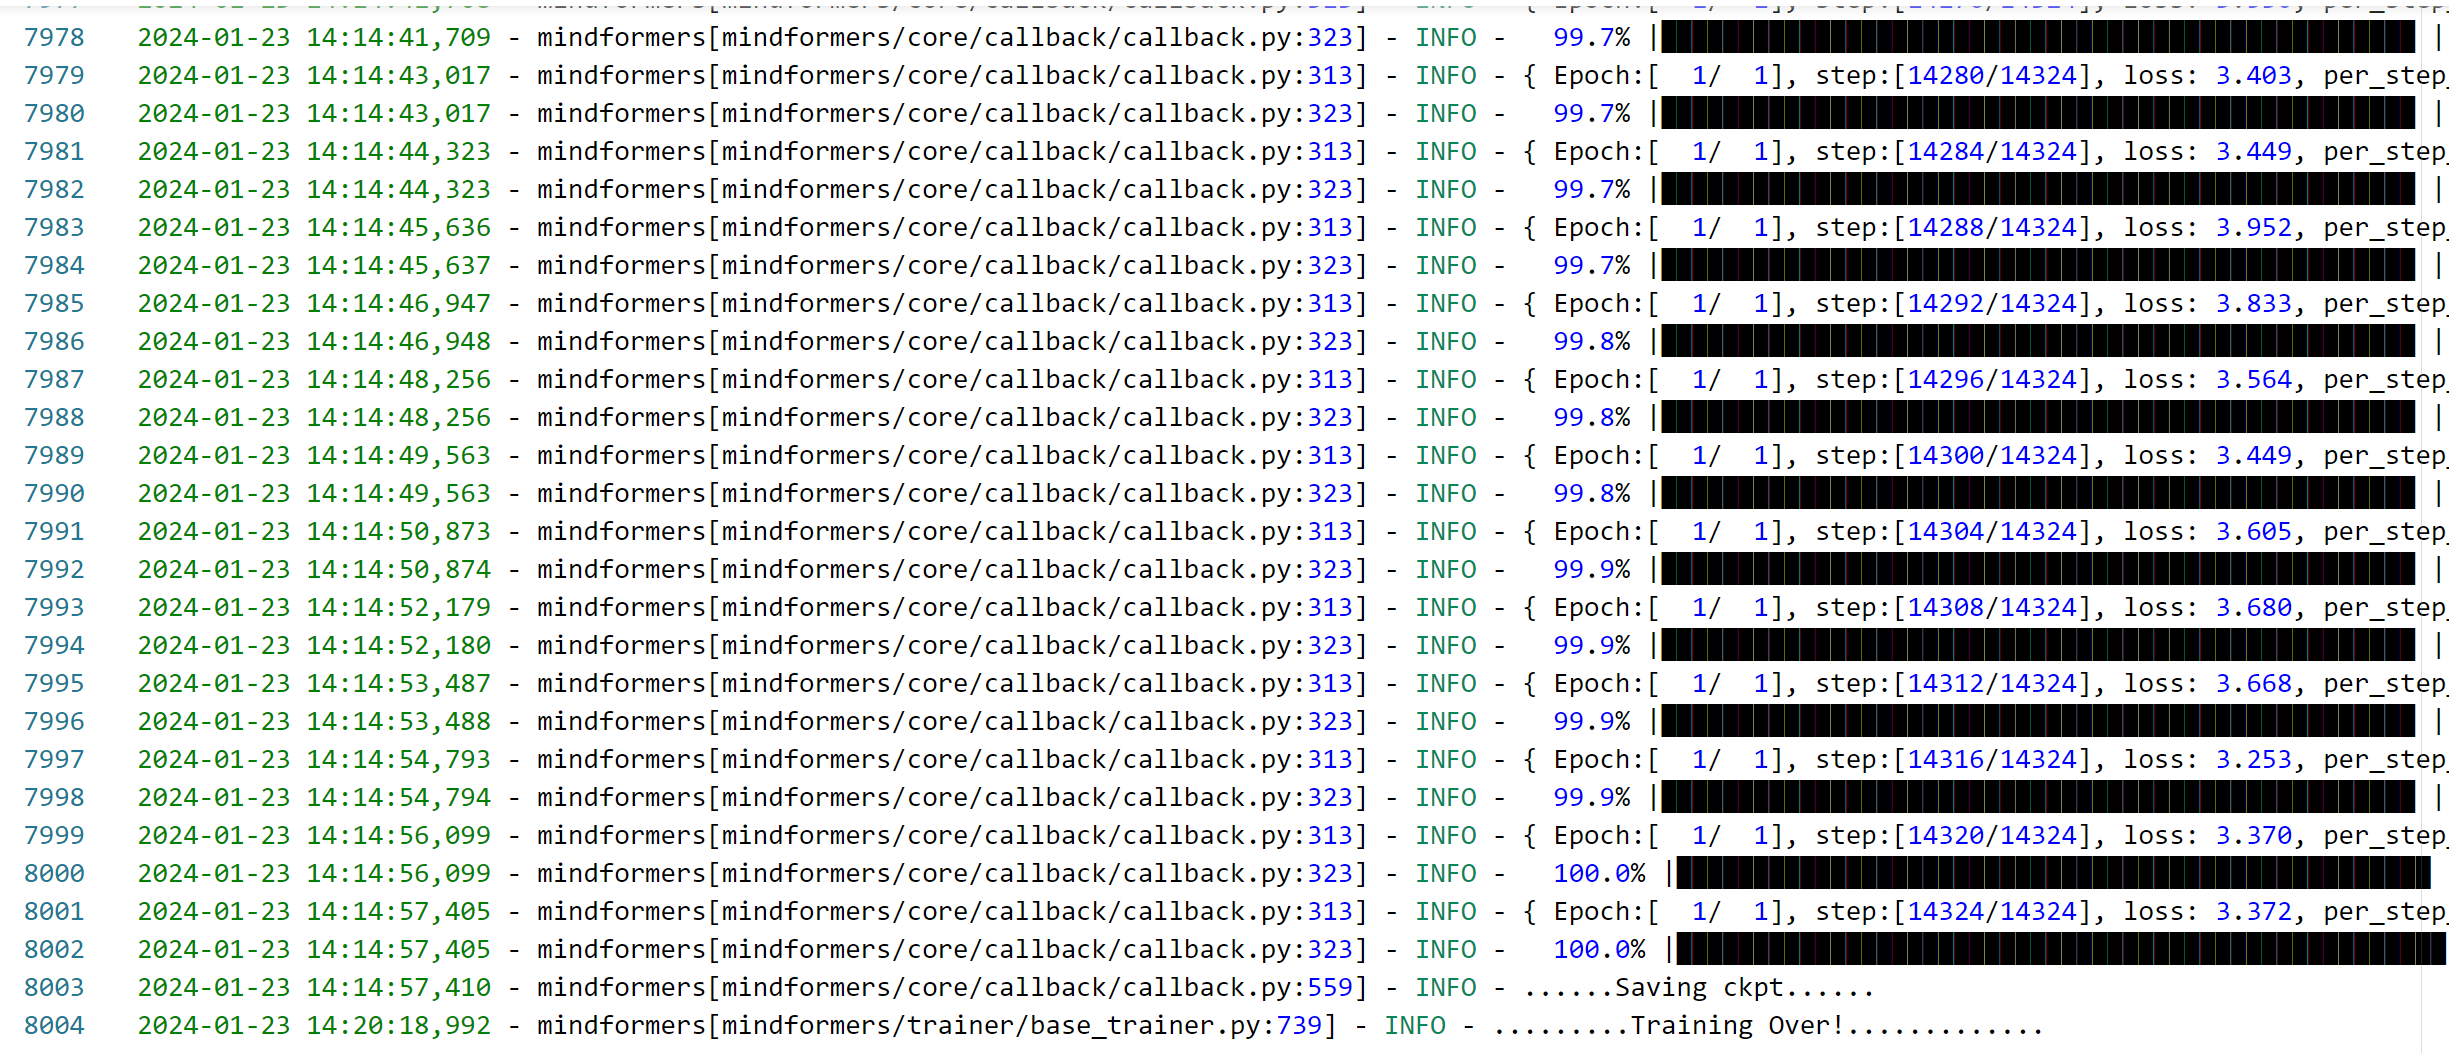

## 微调后推理
推理样例脚本
下面提供一个模型推理样例脚本 infer.py

In [16]:
%pip install tk

Looking in indexes: http://pip.modelarts.private.com:8888/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/MindSpore/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import time
import mindspore as ms
import numpy as np
import argparse
from mindformers.models.glm import GLMConfig, GLMChatModel
from mindformers.models.glm.chatglm_6b_tokenizer import ChatGLMTokenizer
from mindformers.models.glm.glm_processor import process_response
from mindformers.pet.pet_config import LoraConfig
from mindformres.pet import get_pet_model

parser = argparse.ArgumentParser()
parser.add_argument('--seq_length', default=1024, type=int, help='Which device to run service.')
parser.add_argument('--device_id', default=0, type=int, help='Which device to run service.')
parser.add_argument('--checkpoint_path', type=str, default='/home/ma-user/work/mindformers/output/checkpoint/rank_0/glm-6b-lora_rank_0-3581_4.ckpt', help='Checkpoint file to load on.')
parser.add_argument('--vocab_path', type=str, default='/home/ma-user/work/ice_text.model', help='Vocab file to load on.')
parser.add_argument('--is_lora', type=str, default='false',help='Whether is lora model.')

args = parser.parse_args()

if args.is_lora.lower() == "true":
    is_lora = True
else:
    is_lora = False

config = GLMConfig(
    position_encoding_2d=True,
    use_past=True,
    is_sample_acceleration=True,
)

pet_config = LoraConfig(
    lora_rank=8,
    lora_alpha=32,
    lora_dropout=0.1
)


def chat_glm():
    ms.set_context(mode=ms.GRAPH_MODE, device_target="Ascend", device_id=args.device_id)
    model = GLMChatModel(config)
    if is_lora:
       config.pet_config = pet_config
       model = get_pet_model(model, pet_config)
    ms.load_checkpoint(args.checkpoint_path, model)
    tokenizer = ChatGLMTokenizer(args.vocab_path)

    inputs = ["你好",
              "请介绍一下华为",
              "用Python写一个快排",
              "类型#上衣*材质#牛仔布*颜色#白色*风格#简约*图案#刺绣*衣样式#外套*衣款式#破洞"]

    for query in inputs:
        input_ids = tokenizer(query)['input_ids']

        start_time = time.time()
        outputs = model.generate(input_ids, max_length=config.max_decode_length, do_sample=False)
        end_time = time.time()
        print(f'generate speed: {outputs[0].shape[0]/(end_time-start_time):.2f} tokens/s')

        response = tokenizer.decode(outputs)
        response = process_response(response[0])
        print(response)


if __name__ == "__main__":
    chat_glm()

ModuleNotFoundError: No module named 'tk.graph'

## 运行命令

In [ ]:
python infer.py --seq_length 1024 --device_id 0  --checkpoint_path /home/ma-user/work/mindformers/output/checkpoint/rank_0/glm-6b-lora_rank_0-3581_4.ckpt --vocab_path /home/ma-user/work/ice_text.model --is_lora True


参数说明：

seq_length: 用于指定推理输入长度

device_id: 指定推理在那张设备运行

checkpoint_path: 指定训练出来的模型文件路径用于推理

vocab_path: 模型词表

is_lora: 用于区分是否是lora模型，设置为true表示为lora微调训练模型

## 使用LoRA低参微调权重
run_mindformers启动lora eval

使用LoRA低参微调权重时，启动如下shell脚本，执行单卡评估

配置文件选择 configs/glm/run_glm_6b_lora_infer.yaml glm_lora模型推理配置，此配置可用于lora模型，并且评估速度更快

In [8]:
!python mindformers/run_mindformer.py --config configs/glm/run_glm_6b_lora_infer.yaml --run_mode eval --load_checkpoint /home/ma-user/work/mindformers/output/checkpoint/rank_0/glm-6b-lora_rank_0-3581_4.ckpt --eval_dataset_dir /home/ma-user/work/AdvertiseGen/dev.json --device_id 0


/usr/local/Ascend/ascend-toolkit/7.0.RC1/python/site-packages/tbe/tvm/contrib/ccec.py:766: DeprecationWarning: invalid escape sequence \L
  if not dirpath.find("AppData\Local\Temp"):
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/classifier/transdata/transdata_classifier.py:222: DeprecationWarning: invalid escape sequence \B
  """
/usr/local/Ascend/ascend-toolkit/latest/python/site-packages/tbe/dsl/unify_schedule/vector/transdata/common/graph/transdata_graph_info.py:140: DeprecationWarning: invalid escape sequence \c
  """
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, 

各项参数同上，路径需替换为实际路径

使用离线生成数据方式时，将 eval_dataset_dir 一项指向.json文件，如 /path/to/data/AdvertiseGen/dev.json